In [1]:
import datetime as dt
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
from arch import arch_model
import cufflinks as cf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
cf.go_offline()

%matplotlib inline

In [24]:
start = dt.datetime(2015,1,1)
end = dt.datetime.now()
data = web.DataReader("FB",'yahoo',start,end)

In [25]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-09,199.460007,194.889999,194.970001,199.210007,14698600,199.210007
2019-07-10,202.960007,199.669998,200.000000,202.729996,20571700,202.729996
2019-07-11,203.800003,200.210007,203.259995,201.229996,13678500,201.229996
2019-07-12,205.300003,199.160004,199.679993,204.869995,15366300,204.869995
2019-07-15,205.330002,201.820007,204.250000,203.910004,16020000,203.910004


In [317]:
data['mvg_27'] = data['Close'].rolling(27).mean()  
data['mvg_7'] = data['Close'].rolling(7).mean()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in greater

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in less



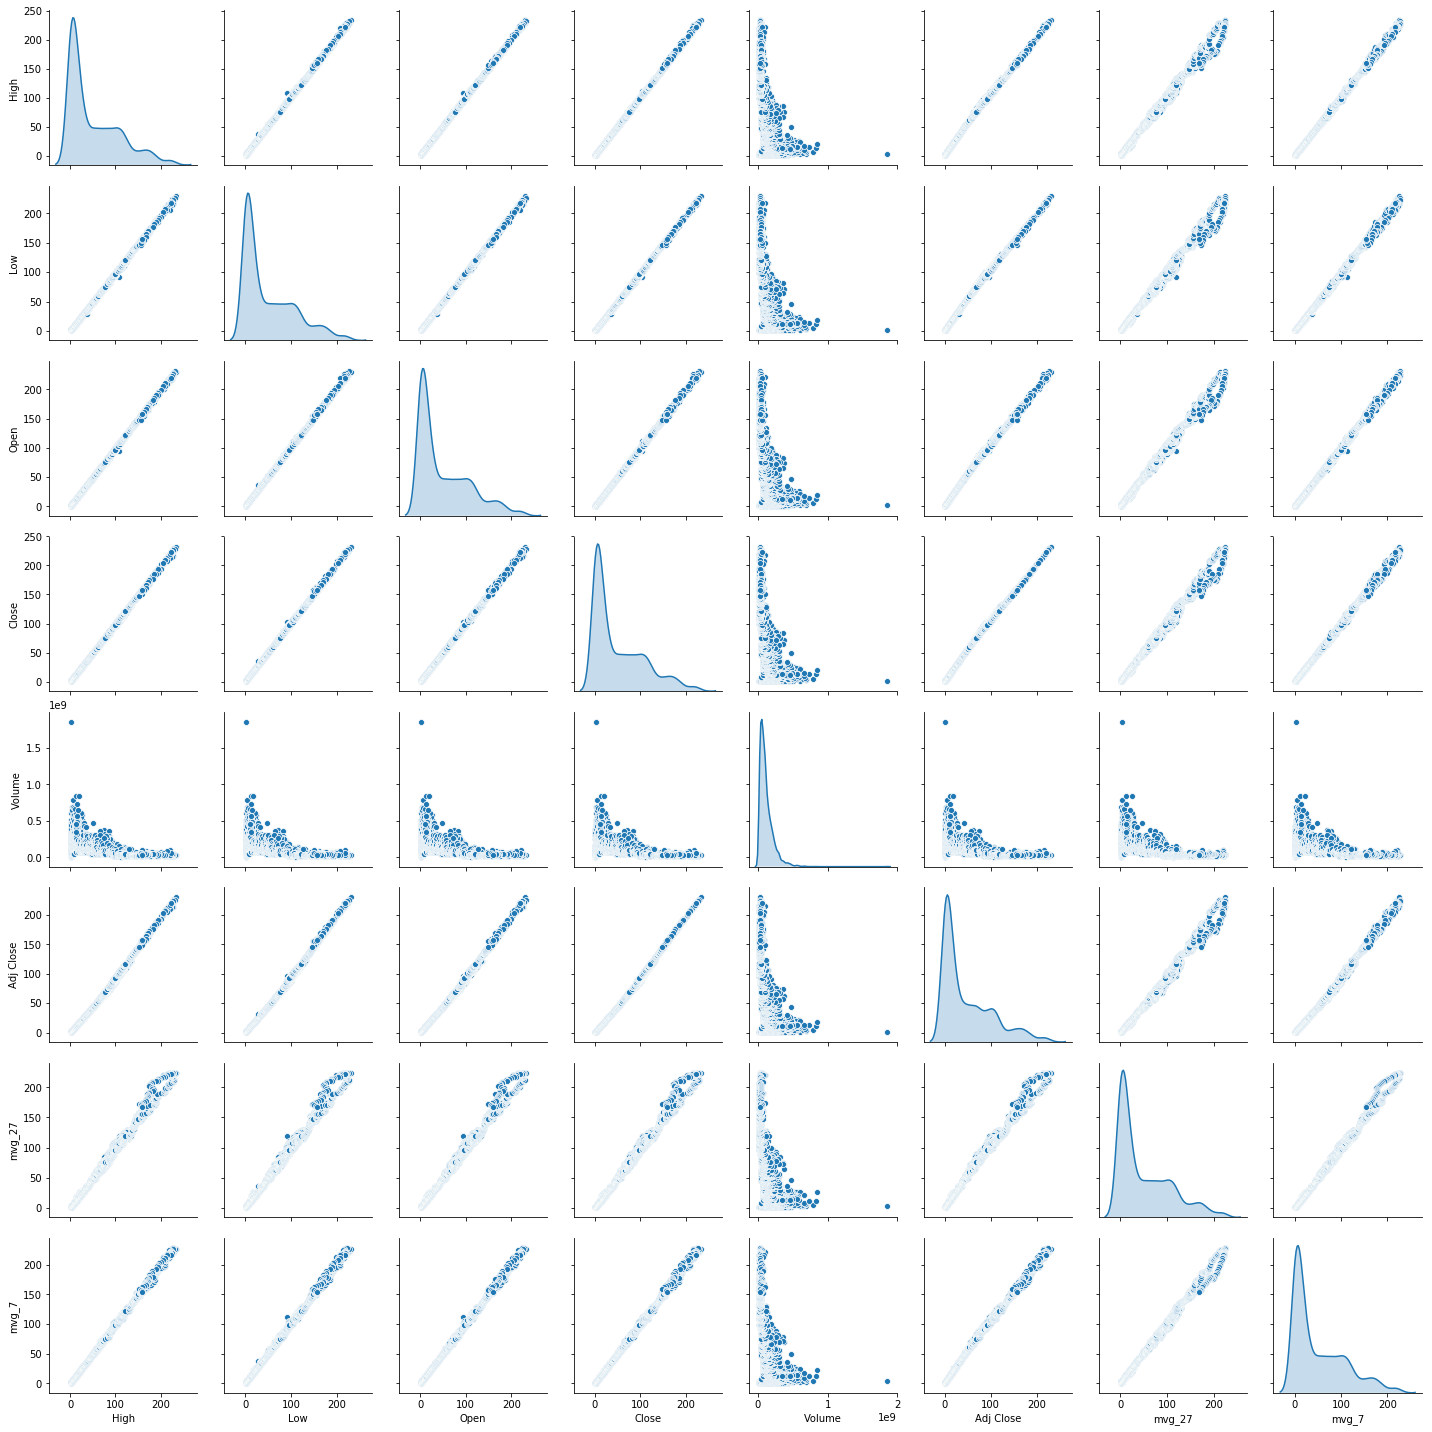

In [205]:
sns.pairplot(data,diag_kind="kde")

data[['Close','mvg_27','mvg_7']].iplot()

data['Volume'].iplot()

returns = 100 * data['Close'].pct_change().dropna()
am = arch_model(returns)

res = am.fit()

print(res.summary())

fig = res.plot(annualize='D')

plt.rcParams['figure.figsize'] = (16, 8)

plt.ylabel("Esperance du rendement")
plt.xlabel("Risque (ecart-type)")

#### Ratio de sharp

E_r_p = 0.10
r_f = 0.02
sigma_p = 0.20

a = (E_r_p - r_f) / sigma_p
b = r_f
sigma_p_list = np.arange(0.0, 2 * sigma_p, 0.01)
E_r_p_list = [a * x + b for x in sigma_p_list]

sigma_p_list

plt.plot(sigma_p_list, E_r_p_list)
plt.plot([0, sigma_p], [r_f, E_r_p], 'ro')

plt.axis([0, 2 * sigma_p, 0, 2 * E_r_p])
plt.ylabel('Esperance du rendement')
plt.xlabel('Risque (ecart-type)')

E_r_p = 0.10
r_f = 0.02
sigma_p = 0.20
U = r_f
sigma_p_list = np.arange(0.0, 2 * sigma_p, 0.01)

for A_n in np.arange(0, 10, 2):
    A_n_list = [U + A_n * x ** (2) for x in sigma_p_list]
    plt.plot(sigma_p_list, A_n_list, label=A_n)

plt.axis([0, 2 * sigma_p, 0, 2 * E_r_p])
plt.ylabel('Esperance du rendement')
plt.xlabel('Risque (ecart-type)')
plt.legend()

## ARIMA

In [4]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

model = sm.tsa.statespace.SARIMAX(data['Close'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

results.resid.plot()

results.resid.plot(kind='kde')

data['forecast'] = results.predict(start = 4350, end= 4600, dynamic= True)  
data[['Close','forecast']].plot(figsize=(12,8))

model = ARIMA(data['Close'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors

model_fit.resid.plot()



## Test Unitaire

In [49]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

from math import sqrt
from sklearn.metrics import mean_squared_error

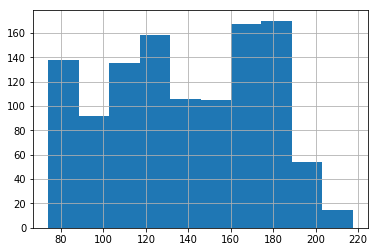

In [50]:
data['Close'].hist()

In [51]:
# create Difference

def difference(dataset):
    diff = list()
    for i in range(1,len(dataset)):
        value = dataset[i] - dataset[i-1]
        diff.append(value)
    return pd.Series(diff)


In [52]:
# Difference data

series = data['Close']
X = series.values

stationary = difference(X)
stationary.index = data.index[1:]

In [53]:
# Check if Stationary

result = adfuller(stationary)
print("ADF Statistic : ",result[0])
print("p-value : ",result[1])
print("Critical values :")
for key, value in result[4].items():
    print("\t%s : %.3f" %(key,value))


ADF Statistic :  -33.81838058512847
p-value :  0.0
Critical values :
	1% : -3.436
	5% : -2.864
	10% : -2.568


In [54]:
# ACF et PACF

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
#plot_acf(series, ax=pyplot.gca())
#plot_pacf(series, ax=pyplot.gca())

#### (p,d,q)
- AR I MA
- p < 12
- d < 2
- q < 12


In [55]:
train_size = int(len(data)* 0.5)
train = data['Close'][:train_size]
test = data['Close'][train_size:]
model_fit_list=[]
data['Close'].shape
solde = 10000
solde_list = list()
position = 0
save = 0

In [56]:
print(train_size)
print(len(data))

570
1140


In [57]:
def balance_account(test,history,yhat,predictions,i,solde,position):
    
    
    if yhat > history[-2]:
        position = 1
        print("buy")
        
    if yhat < history[-2]:
        position = 0
        print("sell")
    
    if position == 1:
        save = history[-1] - history[-2]
        solde = solde + save
        
        
    if position == 0:
        save = history[-2] - history[-1]
        solde = solde +save
        
    
    
        
    print(solde)
    print(position)
    print(yhat,history[-2])
    return solde,position

In [43]:
from math import sqrt
from sklearn.metrics import mean_squared_error

predictions = list()
history = [x for x in train.values]
for i in range(len(test)):
    # Predict
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]

    

    obs = test[i]
    history.append(obs)
    
    predictions.append(yhat)
    solde,position = balance_account(test,history,yhat,predictions,i,solde,position)
    
    solde_list.append(solde)
    
    # Observation
    print("Predicted : %.3f , Expected :%.3f" %(yhat,obs))

# Report rmse
rmse = sqrt(mean_squared_error(test, predictions))
print("RMSE : ",rmse)

buy
9999.610000610352
1
[141.23771033] 141.1699981689453
Predicted : 141.238 , Expected :140.780
buy
9999.869995117188
1
[140.86012382] 140.77999877929688
Predicted : 140.860 , Expected :141.040
buy
9998.75
1
[141.15675148] 141.0399932861328
Predicted : 141.157 , Expected :139.920
buy
9998.41000366211
1
[139.96153397] 139.9199981689453
Predicted : 139.962 , Expected :139.580
buy
9998.220001220703
1
[139.65876556] 139.5800018310547
Predicted : 139.659 , Expected :139.390
buy
10000.25
1
[139.4791123] 139.38999938964844
Predicted : 139.479 , Expected :141.420
buy
9999.790008544922
1
[141.6326877] 141.4199981689453
Predicted : 141.633 , Expected :140.960
buy
10001.100006103516
1
[141.0428713] 140.9600067138672
Predicted : 141.043 , Expected :142.270
buy
10002.630004882812
1
[142.44070989] 142.27000427246094
Predicted : 142.441 , Expected :143.800
buy
10002.509994506836
1
[143.99406161] 143.8000030517578
Predicted : 143.994 , Expected :143.680
buy
10004.300003051758
1
[143.78393618] 143.679

sell
10015.709991455078
0
[167.38101731] 167.39999389648438
Predicted : 167.381 , Expected :168.080
buy
10018.379989624023
1
[168.24895143] 168.0800018310547
Predicted : 168.249 , Expected :170.750
buy
10018.629989624023
1
[170.97830951] 170.75
Predicted : 170.978 , Expected :171.000
buy
10017.629989624023
1
[171.1229189] 171.0
Predicted : 171.123 , Expected :170.000
buy
10014.539993286133
1
[170.09675852] 170.0
Predicted : 170.097 , Expected :166.910
buy
10015.039993286133
1
[166.92783144] 166.91000366210938
Predicted : 166.928 , Expected :167.410
buy
10015.40998840332
1
[167.59113925] 167.41000366210938
Predicted : 167.591 , Expected :167.780
buy
10017.269989013672
1
[167.91745967] 167.77999877929688
Predicted : 167.917 , Expected :169.640
buy
10016.33999633789
1
[169.84221657] 169.63999938964844
Predicted : 169.842 , Expected :168.710
buy
10015.369995117188
1
[168.78778978] 168.7100067138672
Predicted : 168.788 , Expected :167.740
buy
10013.949996948242
1
[167.84560117] 167.74000549

KeyboardInterrupt: 

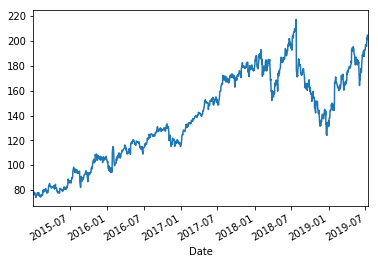

In [30]:
data['Close'].plot()

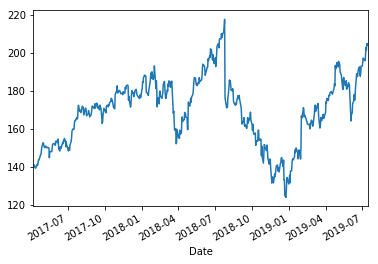

In [34]:
test.plot()

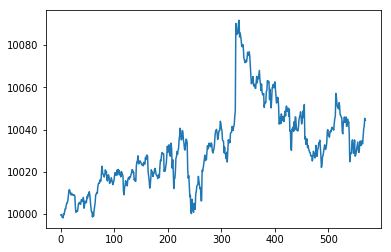

In [33]:
pyplot.plot(solde_list)

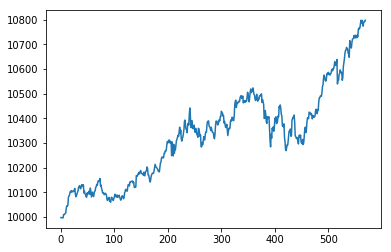

In [23]:
pyplot.plot(solde_list)

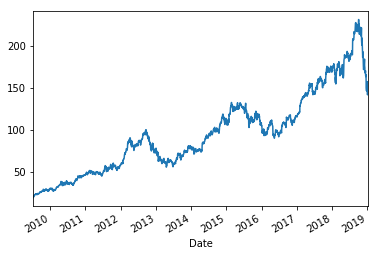

In [139]:
test.plot()

In [59]:
# Evaluate ARILA model

def evaluate_arima_model(dataset,arima_order):
    # prepare training dataset
    train_size = int(len(dataset) * 0.50)
    train ,test = dataset[:train_size], dataset[train_size:]
    history = [x for x in train]
    
    # make predictions
    predictions = list()
    for i in range(len(test)):m
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[i])
    
    # Report rmse
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

IndentationError: unexpected indent (<ipython-input-59-96302219c5dc>, line 12)

In [58]:
# Evaluate combinaison of p,d and q values for an arima model

import warnings

def evaluate_modebtls(dataset,p_values,d_values,q_values):
    best_rmse, best_cfg = float("inf"), None
    for p in range(p_values):
        for d in range(d_values):
            for q in range(q_values):
                order = (p,d,q)
                try:    
                    rmse = evaluate_arima_model(dataset,order)
                    if rmse < best_rmse:
                        best_rmse, best_cfg = rmse, order
                    print("ARIMA%s , RMSE : %.3f" %(order,rmse))
                except:
                    continue
    print("Best ARIMA%s , RMSE : %.3f" %(best_cfg,best_rmse))

p_values = 13
d_values = 4
q_values = 13

warnings.filterwarnings("ignore")
evaluate_models(data['Close'].values, p_values, d_values, q_values)

NameError: name 'evaluate_models' is not defined

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1295ce5c0>],
      dtype=object)

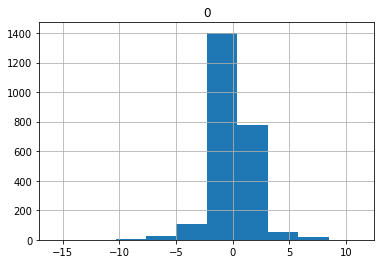

In [61]:
# Load Data
X = data['Close']
train_size = int(len(X) * 0.50)
train, test = X[:train_size], X[train_size:]
history = [x for x in train]

# ARIMA Model
predictions = list()
for i in range(len(test)):
    # Predict
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    # Observation
    obs = test[i]
    history.append(obs)
    
    
# Errors
residuals = [test[i] - predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
residuals.hist(ax=pyplot.gca())    


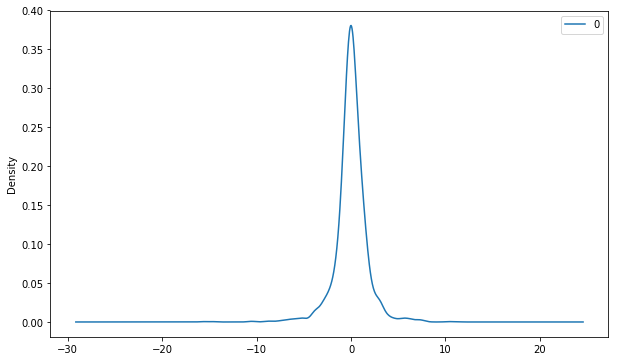

In [62]:
residuals.plot(kind='kde',ax=pyplot.gca(),figsize=(10,6))

In [16]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
#plot_pacf(residuals, ax=pyplot.gca())

NameError: name 'pyplot' is not defined

### Finalyze Model

In [64]:
X = data['Close'].values

# Fit model
model = ARIMA(X, order=(0,1,2))
model_fit = model.fit(disp=0)
model_fit.save('model.pkl')

In [65]:
from statsmodels.tsa.arima_model import ARIMAResults

model_fit = ARIMAResults.load('model.pkl')
predictions = model_fit.forecast()[0]
print("Predicted : %f3" % predictions)

Predicted : 150.8580663


In [66]:
data['Close'].tail(10)

Date
2018-12-24    146.830002
2018-12-26    157.169998
2018-12-27    156.149994
2018-12-28    156.229996
2018-12-31    157.740005
2019-01-02    157.919998
2019-01-03    142.190002
2019-01-04    148.259995
2019-01-07    147.929993
2019-01-08    150.750000
Name: Close, dtype: float64

In [67]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2019,1,10)
data2 = web.DataReader("AAPL",'yahoo',start,end)

In [68]:
data2['Close'].tail(10)

Date
2018-12-27    156.149994
2018-12-28    156.229996
2018-12-31    157.740005
2019-01-02    157.919998
2019-01-03    142.190002
2019-01-04    148.259995
2019-01-07    147.929993
2019-01-08    150.750000
2019-01-09    153.309998
2019-01-10    153.800003
Name: Close, dtype: float64

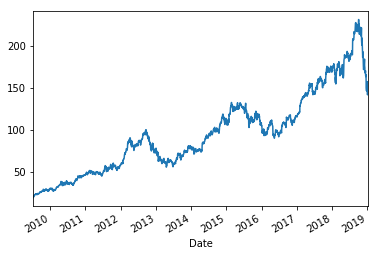

In [69]:
test.plot()

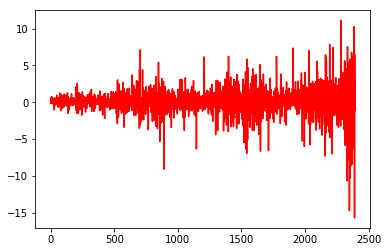

In [71]:
pyplot.plot(residuals, color='red')

for x in range(2): 
    for y in range(3):  
        model = ARIMA(train, order=(x,y,0))
        model_fit_list.append(model.fit(disp=0))
            #print(model_fit.summary())

import math
from sklearn.metrics import mean_squared_error

print("model_fif_list : ",len(model_fit_list))

for x in range(len(model_fit_list)):
    #print(model_fit_list[x].predict(dynamic=True))
    prediction = model_fit_list[x].predict(start= 4000,end=4778)
    rmse = math.sqrt(mean_squared_error(test, prediction))
    print("rmse[",x,"] : ",rmse)

for x in range(len(model_fit_list)):
    model_fit_list[x].resid.iplot()
    
data['predict'] = model_fit_list[3].predict(start= 4000,end=4778)
data[['Close','predict']].iplot()

model = sm.tsa.statespace.SARIMAX(data['Close'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())
data['forecast'] = results.predict(start = 4350, end= 4600, dynamic= True)  
data[['Close','forecast']].iplot()

## Prediction with ARIMA Model

In [10]:
import quandl
import pandas as pd
import datetime as dt

from statsmodels.tsa.arima_model import ARIMAResults

In [23]:
#collapse="monthly"
start = dt.datetime(2010,1,1)
end = dt.datetime(2019,7,12) #dt.datetime.now()
df = web.DataReader("AAPL",'yahoo',start,end)

In [14]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-09,201.509995,198.809998,199.199997,201.240005,20578000.0,201.240005
2019-07-10,203.729996,201.559998,201.850006,203.229996,17897100.0,203.229996
2019-07-11,204.389999,201.710007,203.309998,201.750000,20191800.0,201.750000
2019-07-12,204.000000,202.199997,202.449997,203.300003,17595200.0,203.300003
2019-07-15,205.869995,204.000000,204.089996,205.210007,16937700.0,205.210007


In [24]:
def create_ARIMA_model(dataset):
    X = dataset['Close'].values
    model = ARIMA(X,order=(0,1,2))
    model_fit = model.fit(disp=0)
    model_fit.save('model.pkl')
    
    
def use_model():
    model_fit = ARIMAResults.load("model.pkl")
    predictions = model_fit.forecast()[0]
    return predictions

create_ARIMA_model(df)
predict = use_model()
print("Prediction : %f3" % predict)
    

Prediction : 203.4455853


In [20]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-03,204.440002,202.690002,203.279999,204.410004,11362000.0,204.410004
2019-07-05,205.080002,202.899994,203.350006,204.229996,17265500.0,204.229996
2019-07-08,201.399994,198.410004,200.809998,200.020004,25338600.0,200.020004
2019-07-09,201.509995,198.809998,199.199997,201.240005,20578000.0,201.240005
2019-07-10,203.729996,201.559998,201.850006,203.229996,17897100.0,203.229996


In [32]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2016,3,9)
quandl.ApiConfig.api_key = "sFHqMh8KUnPWatzi-xRC"
df2 = web.DataReader("AAPL",'yahoo',start,end,interval='d')

TypeError: DataReader() got an unexpected keyword argument 'interval'

In [33]:
web.DataReader()

NameError: name 'DataReader' is not defined

In [174]:
df2.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-03,101.709999,100.449997,100.580002,101.500000,36955700.0,96.013351
2016-03-04,103.750000,101.370003,102.370003,103.010002,46055100.0,97.441711
2016-03-07,102.830002,100.959999,102.389999,101.870003,35828900.0,96.363358
2016-03-08,101.760002,100.400002,100.779999,101.029999,31561900.0,95.568756
2016-03-09,101.580002,100.269997,101.309998,101.120003,27201700.0,95.653908


In [217]:
data = {'Date':[],'Close':[]}
df_w = pd.DataFrame(data)
df_w['Date'][4] = 0

In [237]:
date_list = list()
val_list = list()

In [238]:
moy = 0
j = 0
for i in range(len(df)):
    moy = moy + df['Close'][i]
    if (i % 7 == 0):
        date_list.append(df.index[i])
        val_list.append(moy/7)
        #df_x['Close'][j] = moy
        moy = 0
        
        

In [253]:
df_w['Close'] = val_list
df_w['Date'] = date_list
df_w = df_w.set_index('Date')

In [255]:
df_w.tail()

,Close
Date,
2016-01-13,98.957141
2016-01-25,98.180000
2016-02-03,96.014284
2016-02-12,94.654284
2016-02-24,96.390000


In [264]:
train_size = int(len(df_w) * 0.93)
train_size

540

In [282]:
train = df_w['Close'][:539]
test = df_w['Close'][539:]

In [283]:
predictions = list()
history = [x for x in train.values]
for i in range(len(test)):
    # Predict
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    # Observation
    obs = test[i]
    history.append(obs)
    print("Predicted : %.3f , Expected :%3.f" %(yhat,obs))

# Report rmse
rmse = sqrt(mean_squared_error(test, predictions))
print("RMSE : ",rmse)

Predicted : 109.579 , Expected :112
Predicted : 112.406 , Expected :109
Predicted : 109.052 , Expected :109
Predicted : 109.459 , Expected :116
Predicted : 116.947 , Expected :122
Predicted : 123.030 , Expected :130
Predicted : 131.293 , Expected :129
Predicted : 129.113 , Expected :125
Predicted : 124.075 , Expected :127
Predicted : 126.946 , Expected :125
Predicted : 125.135 , Expected :126
Predicted : 126.755 , Expected :128
Predicted : 128.204 , Expected :129
Predicted : 129.014 , Expected :126
Predicted : 126.276 , Expected :130
Predicted : 131.053 , Expected :131
Predicted : 131.060 , Expected :128
Predicted : 127.631 , Expected :127
Predicted : 127.434 , Expected :126
Predicted : 126.197 , Expected :124
Predicted : 124.070 , Expected :128
Predicted : 128.666 , Expected :121
Predicted : 120.345 , Expected :116
Predicted : 114.668 , Expected :112
Predicted : 111.809 , Expected :110
Predicted : 110.138 , Expected :112
Predicted : 112.415 , Expected :115
Predicted : 115.435 , Expect

In [270]:
df_w['Close'][540]

109.09000069754464

In [276]:
df_w['Date'] = df_w.index
df_w['Date'][540]

Timestamp('2015-01-13 00:00:00')